In [3]:
from main import *

In [4]:
sigma = 0.5
k = 500
min = 50

In [9]:
input_path = "data/VOC2012_test/JPEGImages/2008_000200.jpg"

Height:  375
Width:   500
Execution time: 0 minute(s) and 14 seconds


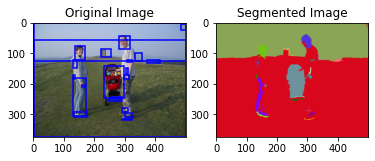

In [10]:
univ, output = segment(input_path, sigma, k, min)

In [8]:
import pandas as pd
import xml.etree.ElementTree as et

def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [14]:
parse_XML("data/VOC2012_test/Annotations/2008_000200.xml",["object","name","bndbox","xmin","ymin",'xmax',"ymax"])

,object,name,bndbox,xmin,ymin,xmax,ymax
0,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None
5,None,person,\n\t\t\t,None,None,None,None
6,None,person,\n\t\t\t,None,None,None,None


In [13]:
xtree = et.parse("data/VOC2012_test/Annotations/2008_000200.xml")
xroot = xtree.getroot()

In [21]:
for node in xroot:
    print(node)

<Element 'folder' at 0x0000024CDF1EAAE0>
<Element 'filename' at 0x0000024CDF1EA180>
<Element 'source' at 0x0000024CDF1EA7C0>
<Element 'size' at 0x0000024CDF1EA6D0>
<Element 'segmented' at 0x0000024CDF1EAF90>
<Element 'object' at 0x0000024CDF1EADB0>
<Element 'object' at 0x0000024CDF1EAD60>
